# PYTHON END TO END CASE STUDY - MARKETING ANALYTICS

### IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

%matplotlib inline

# IMPORTING DATASETS

In [2]:
path = 'C:/Users/shubh/Desktop/ALABS PYTHON CASE STUDIES/FOUNDATION/9. End to End Foundation Case Study-1/'

In [3]:
customers            = pd.read_csv( path + 'CUSTOMERS.csv' )
sellers              = pd.read_csv( path + 'SELLERS.csv' )
products             = pd.read_csv( path + 'PRODUCTS.csv' )
orders               = pd.read_csv( path + 'ORDERS.csv' )
order_items          = pd.read_csv( path + 'ORDER_ITEMS.csv' )
order_payments       = pd.read_csv( path + 'ORDER_PAYMENTS.csv' )
order_review_ratings = pd.read_csv( path + 'ORDER_REVIEW_RATINGS.csv' )
geo_location         = pd.read_csv( path + 'GEO_LOCATION.csv' )

In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [5]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3038 non-null   object
 3   seller_state            3038 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [6]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32328 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [8]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [9]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [10]:
order_review_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_creation_date     100000 non-null  object
 4   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [11]:
geo_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19015 entries, 0 to 19014
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   geolocation_zip_code_prefix  19015 non-null  int64  
 1   geolocation_lat              19015 non-null  float64
 2   geolocation_lng              19015 non-null  float64
 3   geolocation_city             19015 non-null  object 
 4   geolocation_state            19015 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 742.9+ KB


## EXPLORATORY DATA ANALYSIS

### Q1. (a) 
Define & calculate high level metrics like (Total Revenue, Total quantity, Total products, Total categories, Total sellers, Total locations, Total channels, Total payment methods etc…)

In [145]:
q1_data_a = pd.merge(left = order_payments, right = orders, on = 'order_id', how = 'left')[['order_id', 'order_status', 'payment_value']]
q1_data_a = q1_data_a.loc[((q1_data_a['order_status'] != 'unavailable') & (q1_data_a['order_status'] != 'canceled')), ]
q1_data_a

,order_id,order_status,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,delivered,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,delivered,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,delivered,65.71
3,ba78997921bbcdc1373bb41e913ab953,delivered,107.78
4,42fdf880ba16b47b59251dd489d4441a,delivered,128.45
...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,delivered,363.31
103882,7b905861d7c825891d6347454ea7863f,delivered,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,invoiced,47.77
103884,b8b61059626efa996a60be9bb9320e10,delivered,369.54


In [146]:
print('Total Revenue : ', q1_data_a.payment_value.sum())

Total Revenue :  15739137.01


In [149]:
print('Total Quantity : ', order_items.order_item_id.count())

Total Quantity :  112650


In [152]:
print('Total Products : ', products['product_id'].nunique())

Total Products :  32951


In [153]:
print('Total Categories : ', products.product_category_name.nunique())

Total Categories :  71


In [154]:
print('Total Sellers : ', sellers.seller_id.count())

Total Sellers :  3095


In [155]:
print('Total Locations : ', geo_location.geolocation_zip_code_prefix.count())

Total Locations :  19015


In [156]:
print('Total Payment Methods : ', order_payments.payment_type.unique())

Total Payment Methods :  ['credit_card' 'UPI' 'voucher' 'debit_card' 'not_defined']


In [159]:
print('Total Seller Cities : ', sellers.seller_city.nunique())

Total Seller Cities :  534


In [160]:
print('Total Seller States : ', sellers.seller_state.nunique())

Total Seller States :  19


In [161]:
print('Total Customer Cities : ', customers.customer_city.nunique())

Total Customer Cities :  4119


In [162]:
print('Total Customer States : ', customers.customer_state.nunique())

Total Customer States :  20


In [165]:
print('Minimum Rating : ', order_review_ratings.review_score.min())
print('Maximum Rating : ', order_review_ratings.review_score.max())
print('Overall Average Rating : ', order_review_ratings.review_score.mean())
print('Overall Median Rating : ', order_review_ratings.review_score.median())
print('Overall Standard Deviation in Rating : ', order_review_ratings.review_score.std())

Minimum Rating :  1
Maximum Rating :  5
Overall Average Rating :  4.07089
Overall Median Rating :  5.0
Overall Standard Deviation in Rating :  1.359662860687365


### Q1. (b)
Understanding how many new customers acquired every month

In [61]:
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'], format = '%m/%d/%Y %H:%M')

In [73]:
q1_data_b = pd.merge(left = customers, right = orders, on = 'customer_id', how = 'inner')[['customer_id', 'order_status',   'order_approved_at']]

In [74]:
q1_data_b = q1_data_b[(q1_data_b['order_status'] != 'canceled') | (q1_data_b['order_status'] != 'unavailable')]

In [75]:
q1_data_b = q1_data_b.groupby('customer_id', as_index = False).agg({'order_approved_at' : 'min'})[['customer_id', 'order_approved_at']]

In [76]:
q1_data_b['year'] = pd.DatetimeIndex(q1_data_b.order_approved_at).year.astype('object')
q1_data_b['month'] = pd.DatetimeIndex(q1_data_b.order_approved_at).month.astype('object')

In [77]:
# NO. OF NEW CUSTOMERS ACQUIRED IN EACH MONTH FOR EACH YEAR
q1_data_b.groupby(['year', 'month'], as_index = False).agg({'customer_id' : 'count'})[['year', 'month', 'customer_id']]

,year,month,customer_id
0,2016.0,9.0,1
1,2016.0,10.0,320
2,2016.0,12.0,1
3,2017.0,1.0,760
4,2017.0,2.0,1765
5,2017.0,3.0,2689
6,2017.0,4.0,2374
7,2017.0,5.0,3693
8,2017.0,6.0,3252
9,2017.0,7.0,3974


### Q1. (c)
Understand the retention of customers on month on month basis

In [166]:
# CANNOT PERFORM THIS ANALYSIS AS FOR EACH CUSTOMER WE HAVE ONLY ONE TRANSACTION AVAILABLE

### Q1. (d)
How the revenues from existing/new customers on month on month basis

In [102]:
q1_data_d = pd.merge(left = order_payments, right = orders, on = 'order_id', how = 'left')[['order_approved_at', 'payment_value']]

In [103]:
q1_data_d['year'] = pd.DatetimeIndex(q1_data_d.order_approved_at).year
q1_data_d['month'] = pd.DatetimeIndex(q1_data_d.order_approved_at).month

In [110]:
q1_data_d.groupby(['year', 'month'], as_index = False).agg('sum')

,year,month,payment_value
0,2016.0,10.0,58380.74
1,2016.0,12.0,19.62
2,2017.0,1.0,131835.87
3,2017.0,2.0,291836.22
4,2017.0,3.0,446020.61
5,2017.0,4.0,413537.47
6,2017.0,5.0,593119.02
7,2017.0,6.0,515293.57
8,2017.0,7.0,585260.30
9,2017.0,8.0,672772.79


<AxesSubplot:>

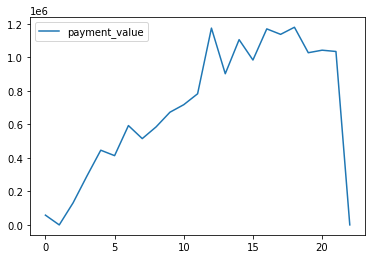

In [108]:
q1_data_d.groupby(['year', 'month'], as_index = False).agg('sum')[['payment_value']].plot(kind = 'line')

### Q1. (e)
Understand the trends/seasonality of sales, quantity by category, location, month, week, day, time, channel, payment method etc…

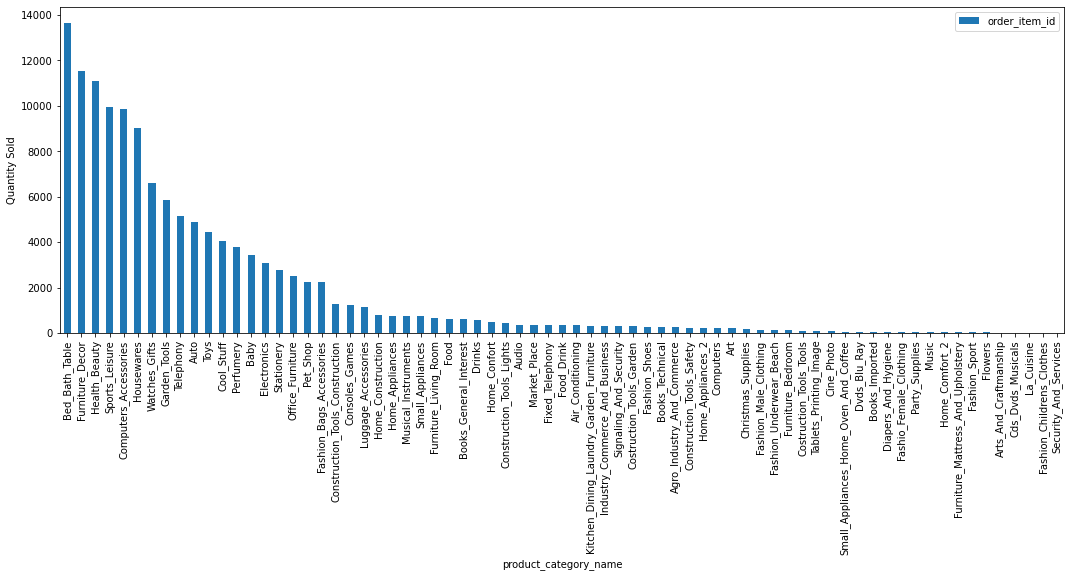

In [14]:
# SALES QUANTITY BY PRODUCT CATEGORY
pd.merge(left = order_items, right = products, on = 'product_id', how = 'left')[['product_category_name', 'order_item_id']].groupby('product_category_name').agg('sum').sort_values('order_item_id', ascending = False).plot(kind = 'bar', figsize = (18, 6))
plt.ylabel('Quantity Sold')
plt.show()

In [167]:
# SALES QUANTITY CUSTOMER CITY
q1_data_e2 = pd.merge(left = order_items, right = orders, on = 'order_id', how = 'left')[['order_id', 'customer_id', 'order_item_id', 'seller_id']]
q1_data_e2 = pd.merge(left = q1_data_e2, right = customers, on = 'customer_id', how = 'left')[['customer_city', 'order_item_id']]
q1_data_e2.groupby('customer_city').agg('count').sort_values('order_item_id', ascending = False)

,order_item_id
customer_city,
Akkarampalle,17808
Badepalle,7837
Anantapur,3144
Eddumailaram,2392
Anakapalle,1751
...,...
Neripperichal,1
Nepanagar,1
Nemili,1


In [168]:
# SALES QUANTITY BY MONTH
q1_data_e3 = pd.merge(left = order_items, right = orders, on = 'order_id', how = 'left')[['order_approved_at', 'order_item_id']]
q1_data_e3['year'] = pd.DatetimeIndex(q1_data_e3.order_approved_at).year.astype('object')
q1_data_e3['month'] = pd.DatetimeIndex(q1_data_e3.order_approved_at).month.astype('object')
q1_data_e3.groupby(['year', 'month'], as_index = False).agg('count')

,year,month,order_approved_at,order_item_id
0,2016.0,9.0,3,3
1,2016.0,10.0,366,366
2,2016.0,12.0,1,1
3,2017.0,1.0,908,908
4,2017.0,2.0,1931,1931
5,2017.0,3.0,3022,3022
6,2017.0,4.0,2655,2655
7,2017.0,5.0,4130,4130
8,2017.0,6.0,3602,3602
9,2017.0,7.0,4464,4464


<AxesSubplot:xlabel='year,month'>

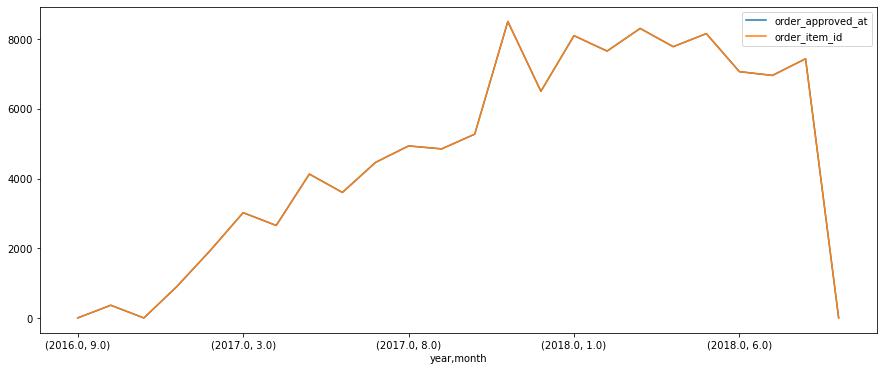

In [169]:
q1_data_e3.groupby(['year', 'month']).agg('count').plot(kind = 'line', figsize = (15, 6))

In [170]:
# SALES QUANTITY BY WEEK 
q1_data_e4 = pd.concat([q1_data_e3, pd.Series(pd.DatetimeIndex(q1_data_e3.order_approved_at).week, name = 'week')], axis = 1)
q1_data_e4.groupby(['year', 'week']).agg({'order_item_id' : 'count'})[['order_item_id']]

<ipython-input-170-1820cd1ad50c>:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  q1_data_e4 = pd.concat([q1_data_e3, pd.Series(pd.DatetimeIndex(q1_data_e3.order_approved_at).week, name = 'week')], axis = 1)


order_item_id
year   week               
2016.0 37.0              3
       40.0            275
       41.0             91
       51.0              1
2017.0 1.0              44
...                    ...
2018.0 32.0           2288
       33.0           1855
       34.0           1494
       35.0            153
       36.0              1

[92 rows x 1 columns]

<AxesSubplot:xlabel='year,week'>

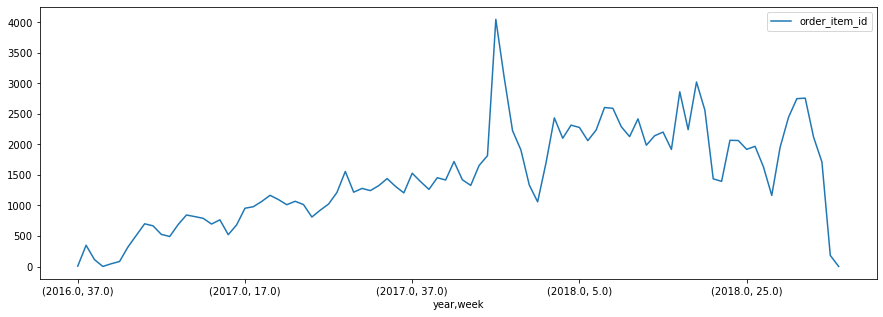

In [171]:
q1_data_e4.groupby(['year', 'week']).agg({'order_item_id' : 'sum'})[['order_item_id']].plot(kind = 'line', figsize = (15, 5))

<AxesSubplot:xlabel='hour'>

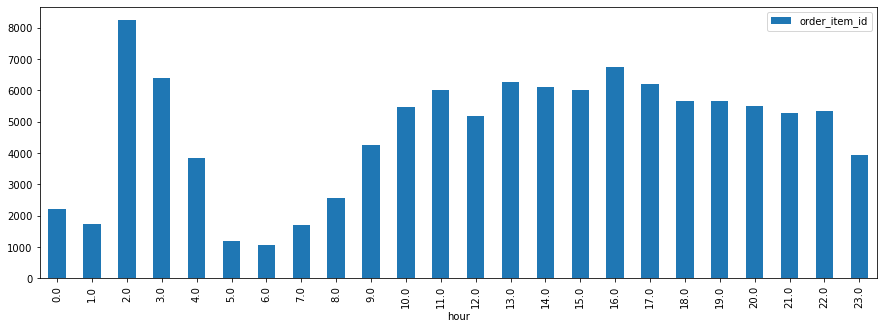

In [172]:
# SALES QUANTITY BY TIME 
q1_data_e5 = pd.concat([q1_data_e3, pd.Series(pd.DatetimeIndex(q1_data_e3.order_approved_at).hour, name = 'hour')], axis = 1)
q1_data_e5.groupby('hour').agg('count')[['order_item_id']].plot(kind = 'bar', figsize = (15, 5))

<AxesSubplot:xlabel='payment_type'>

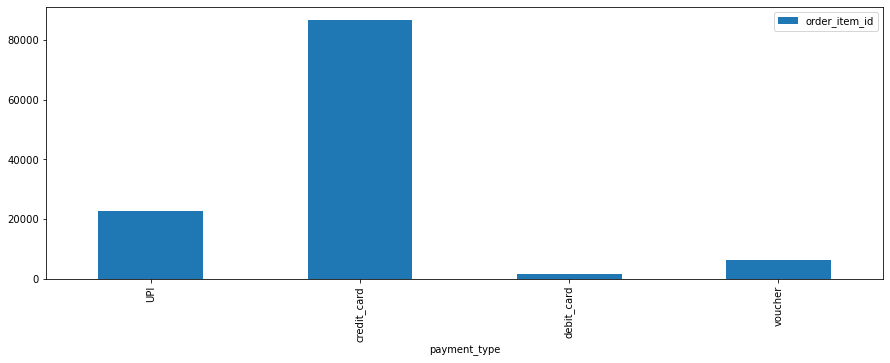

In [173]:
# SALES QUANTITY BY PAYMENT METHOD
q1_data_e6 = pd.merge(left = order_items, right = orders, on = 'order_id', how = 'left')[['order_id', 'order_item_id']]
q1_data_e6 = pd.merge(left = q1_data_e6, right = order_payments, on = 'order_id', how = 'left')[['payment_type', 'order_item_id']]
q1_data_e6.groupby('payment_type').agg('count').plot(kind = 'bar', figsize = (15, 5))

### Q1. (f) 
Popular Products by month, seller, state, category.

In [182]:
# POPULAR PRODUCTS BY MONTH
q1_data_f1 = pd.merge(left = order_items, right = orders, on = 'order_id', how = 'left')[['order_approved_at', 'product_id', 'order_item_id']]
q1_data_f1['month'] = pd.DatetimeIndex(q1_data_f1.order_approved_at).month
q1_data_f1 = q1_data_f1.groupby(['month', 'product_id'], as_index = False).agg('count')[['month', 'product_id', 'order_item_id']].sort_values(['month', 'order_item_id'], ascending = [True, False])

In [183]:
q1_data_f1.loc[q1_data_f1['order_item_id'] >= 50, ]

,month,product_id,order_item_id
3047,1.0,aca2eb7d00ea1a7b8ebd4e68314663af,123
1471,1.0,54d9ac713e253fa1fae9c8003b011c2a,76
948,1.0,36f60d45225e60c7da4558b070ce4b60,54
8942,2.0,e53e557d5a159f5aa2c5e995dfdf244b,72
5760,2.0,3dd2a17168ec895c781a9191c1e95ad7,70
5612,2.0,368c6c730842d78016ad823897a372db,51
13395,3.0,aca2eb7d00ea1a7b8ebd4e68314663af,67
11049,3.0,437c05a395e9e47f9762e677a7068ce7,59
10917,3.0,3dd2a17168ec895c781a9191c1e95ad7,52
19136,4.0,aca2eb7d00ea1a7b8ebd4e68314663af,83


In [176]:
# POPULAR PRODUCTS BY SELLER
q1_data_f2 = pd.merge(left = order_items, right = products, on = 'product_id', how = 'left')[['seller_id', 'product_id', 'order_item_id']]
q1_data_f2 = q1_data_f2.groupby(['seller_id', 'product_id'], as_index = False).agg('count').sort_values(['seller_id', 'order_item_id'], ascending = False)
q1_data_f2.loc[q1_data_f2['order_item_id'] >= 20, ]

,seller_id,product_id,order_item_id
34301,ff063b022a9a0aab91bad2c9088760b7,a5341e3f8155dbb3e62323d3ea289729,41
34302,ff063b022a9a0aab91bad2c9088760b7,a8075470f960215ffb67624782f80fec,34
34258,febab0275244b9a49a623f0bd613ca2f,574597aaf385996112490308e37399ce,24
34130,fde0cc9ea29c8ccfc0a2c22256a58c71,e1e932dfb67414e80b87ad97688cf2a3,23
33978,fc906263ca5083d09dce42fe02247800,06c6e01186af8b98ee1fc9e01f9471e9,60
...,...,...,...
155,00ee68308b45bc5e2660cd833c3f81cc,d692d19cee022f7acab76373f297ad6a,22
139,00ee68308b45bc5e2660cd833c3f81cc,10717ff440b2320081989126e858b220,21
1,001cca7ae9ae17fb1caed9dfb1094831,08574b074924071f4e201e151b152b4e,113
11,001cca7ae9ae17fb1caed9dfb1094831,e251ebd2858be1aa7d9b2087a6992580,48


In [177]:
# POPULAR PRODUCTS BY STATE
q1_data_f3 = pd.merge(left = order_items, right = orders, on = 'order_id', how = 'left')[['customer_id', 'product_id', 'order_item_id']]
q1_data_f3 = pd.merge(left = q1_data_f3, right = customers, on = 'customer_id', how = 'left')[['customer_state', 'product_id', 'order_item_id']]
q1_data_f3 = q1_data_f3.groupby(['customer_state', 'product_id'], as_index = False).agg('count').sort_values(['customer_state', 'order_item_id'], ascending = [True, False])
q1_data_f3.loc[q1_data_f3['order_item_id'] >= 50, ]

,customer_state,product_id,order_item_id
16353,Andhra Pradesh,aca2eb7d00ea1a7b8ebd4e68314663af,345
14598,Andhra Pradesh,99a4788cb24856965c36a24e339b6058,294
6379,Andhra Pradesh,422879e10f46682990de24d770e7f83d,283
8042,Andhra Pradesh,53b36df67ebb7c41585e8d54d6772e08,225
5444,Andhra Pradesh,389d119b48cf3043d311335e499d9c6b,224
...,...,...,...
14028,Andhra Pradesh,93c902b021a9e594f658ab1b0351602a,51
7661,Andhra Pradesh,4fcb3d9a5f4871e8362dfedbdb02b064,50
9338,Andhra Pradesh,617186c3d97ea56c9c683a8a3974e8c1,50
13325,Andhra Pradesh,8c292ca193d326152e335d77176746f0,50


In [178]:
# POPULAR PRODUCTS BY CATEGORIES
q1_data_f4 = pd.merge(left = order_items, right = products, on = 'product_id', how = 'left')[['product_category_name', 'order_item_id']]
q1_data_f4.groupby('product_category_name', as_index = False).agg('count').sort_values('order_item_id', ascending = False).head(35)

,product_category_name,order_item_id
7,Bed_Bath_Table,11115
43,Health_Beauty,9670
65,Sports_Leisure,8641
39,Furniture_Decor,8334
15,Computers_Accessories,7827
49,Housewares,6964
70,Watches_Gifts,5991
68,Telephony,4545
42,Garden_Tools,4347
5,Auto,4235


### Q1. (g) 
Popular categories by state, month

In [179]:
# POPULAR CATEGORIES BY STATE
q1_data_g1 = pd.merge(left = order_items, right = orders, on = 'order_id', how = 'left')[['customer_id', 'product_id', 'order_item_id']]
q1_data_g1 = pd.merge(left = q1_data_g1, right = products, on = 'product_id', how = 'left')[['customer_id', 'product_category_name', 'order_item_id']]
q1_data_g1 = pd.merge(left = q1_data_g1, right = customers, on = 'customer_id', how = 'left')[['customer_state', 'product_category_name', 'order_item_id']]
q1_data_g1 = q1_data_g1.groupby(['customer_state', 'product_category_name'], as_index = False).agg('count').sort_values(['customer_state', 'order_item_id'], ascending = [True, False])
q1_data_g1.loc[q1_data_g1['order_item_id'] >= 100]

,customer_state,product_category_name,order_item_id
7,Andhra Pradesh,Bed_Bath_Table,7101
43,Andhra Pradesh,Health_Beauty,6023
65,Andhra Pradesh,Sports_Leisure,5327
39,Andhra Pradesh,Furniture_Decor,5239
15,Andhra Pradesh,Computers_Accessories,4859
...,...,...,...
954,Tamil Nadu,Watches_Gifts,126
935,Tamil Nadu,Housewares,106
929,Tamil Nadu,Garden_Tools,105
899,Tamil Nadu,Auto,100


In [181]:
# POPULAR CATEGORIES BY MONTH
q1_data_g2 = pd.merge(left = order_items, right = orders, on = 'order_id', how = 'left')[['order_approved_at', 'product_id', 'order_item_id']]
q1_data_g2 = pd.merge(left = q1_data_g2, right = products, on = 'product_id', how = 'left')[['order_approved_at', 'product_category_name', 'order_item_id']]
q1_data_g2['month'] = pd.DatetimeIndex(q1_data_g2.order_approved_at).month
q1_data_g2 = q1_data_g2.groupby(['month', 'product_category_name'], as_index = False).agg('count')[['month', 'product_category_name', 'order_item_id']].sort_values(['month', 'order_item_id'], ascending = [True, False])
q1_data_g2.loc[q1_data_g2['order_item_id'] >= 100, ]

,month,product_category_name,order_item_id
6,1.0,Bed_Bath_Table,871
36,1.0,Furniture_Decor,790
62,1.0,Sports_Leisure,718
13,1.0,Computers_Accessories,711
40,1.0,Health_Beauty,706
...,...,...,...
792,12.0,Stationery,253
787,12.0,Perfumery,249
758,12.0,Electronics,221
739,12.0,Baby,148


### Q1. (h)
List top 10 most expensive products sorted by price

In [88]:
pd.merge(left = products, right = order_items, on = 'product_id', how = 'left')[['product_id', 'product_category_name', 'price']].sort_values('price', ascending = False).head(10)

,product_id,product_category_name,price
20528,489ae2aa008f021502940f251d4cce7f,Housewares,6735.00
73922,69c590f7ffc7bf8db97190b6cb6ed62e,Computers,6729.00
49503,1bdf5e6731585cf01aa8169c7028d6ad,Art,6499.00
71835,a6492cc69376c469ab6f61d8f44de961,Small_Appliances,4799.00
32232,c3ed642d592594bb648ff4a04cee2747,Small_Appliances,4690.00
84506,259037a6a41845e455183f89c5035f18,Computers,4590.00
106405,a1beef8f3992dbd4cd8726796aa69c53,Musical_Instruments,4399.87
104826,6cdf8fc1d741c76586d8b6b15e9eef30,Consoles_Games,4099.99
46034,dd113cb02b2af9c8e5787e8f1f0722f6,Sports_Leisure,4059.00
40027,6902c1962dd19d540807d0ab8fade5c6,Watches_Gifts,3999.90


### Q2. Performing Customers/sellers Segmentation



### (a)
Divide the customers into groups based on the revenue generated

In [22]:
q2_data = pd.merge(left = orders, right = order_items, on = 'order_id', how = 'right')
q2_data.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,9/13/2017 8:59,9/13/2017 9:45,9/19/2017 18:34,9/20/2017 23:43,9/29/2017 0:00,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,4/26/2017 10:53,4/26/2017 11:05,5/4/2017 14:35,5/12/2017 16:04,5/15/2017 0:00,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.9,19.93


In [23]:
q2_data_a = q2_data.groupby('customer_id', as_index = False).agg('sum')[['customer_id', 'price']].sort_values('price', ascending = False)
q2_data_a.head(2)

,customer_id,price
8475,1617b1357756262bfa56ab541c47bc16,13440.0
91284,ec5b2ba62e574342386871631fafd3fc,7160.0


In [24]:
q2_data_a['sales_segment'] = np.where(q2_data_a['price'] < 100, '<100', 
                                   np.where(q2_data_a['price'] < 1000, '100 - 999', 
                                           np.where(q2_data_a['price'] < 10000, '1000 - 9999', '>= 10000')))
q2_data_a.head()

,customer_id,price,sales_segment
8475,1617b1357756262bfa56ab541c47bc16,13440.0,>= 10000
91284,ec5b2ba62e574342386871631fafd3fc,7160.0,1000 - 9999
76948,c6e2731c5b391845f6800c97401a43a9,6735.0,1000 - 9999
94398,f48d464a0baaea338cb25f816991ab1f,6729.0,1000 - 9999
24603,3fd6777bbce08a352fddd04e4a7cc8f6,6499.0,1000 - 9999


In [25]:
q2_data_a['sales_segment'].value_counts()

<100           57707
100 - 999      40013
1000 - 9999      945
>= 10000           1
Name: sales_segment, dtype: int64

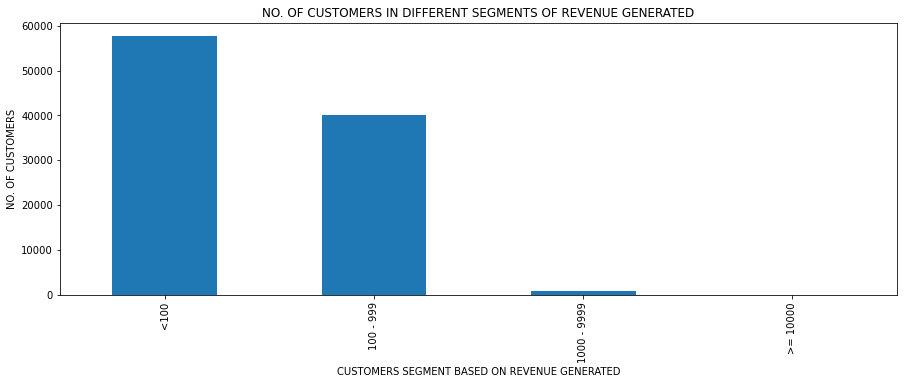

In [26]:
# CUSTOMERS SEGMENT BASED ON REVENUE GENERATED
q2_data_a['sales_segment'].value_counts().plot(kind = 'bar', figsize = (15, 5))
plt.xlabel('CUSTOMERS SEGMENT BASED ON REVENUE GENERATED')
plt.ylabel('NO. OF CUSTOMERS')
plt.title('NO. OF CUSTOMERS IN DIFFERENT SEGMENTS OF REVENUE GENERATED')
plt.show()

### Q2. (b)
Divide the sellers into groups based on the revenue generated

In [27]:
q2_data_b = q2_data.groupby('seller_id', as_index = False).agg('sum')[['seller_id', 'price']]
q2_data_b.head(2)

,seller_id,price
0,0015a82c2db000af6aaaf3ae2ecb0532,2685.00
1,001cca7ae9ae17fb1caed9dfb1094831,25080.03


In [28]:
q2_data_b['sales_segment'] = np.where(q2_data_b['price'] < 1000, '< 1000', 
                                     np.where(q2_data_b['price'] < 10000, '1000 - 9999', 
                                             np.where(q2_data_b['price'] < 100000, '10000 - 99999', '>= 100000')))
q2_data_b.head()

,seller_id,price,sales_segment
0,0015a82c2db000af6aaaf3ae2ecb0532,2685.00,1000 - 9999
1,001cca7ae9ae17fb1caed9dfb1094831,25080.03,10000 - 100000
2,001e6ad469a905060d959994f1b41e4f,250.00,< 1000
3,002100f778ceb8431b7a1020ff7ab48f,1234.50,1000 - 9999
4,003554e2dce176b5555353e4f3555ac8,120.00,< 1000


In [29]:
# SELLERS SEGMENTS BASED ON REVENUE GENERATED
q2_data_b['sales_segment'].value_counts()

< 1000            1667
1000 - 9999       1136
10000 - 100000     274
>= 100000           18
Name: sales_segment, dtype: int64

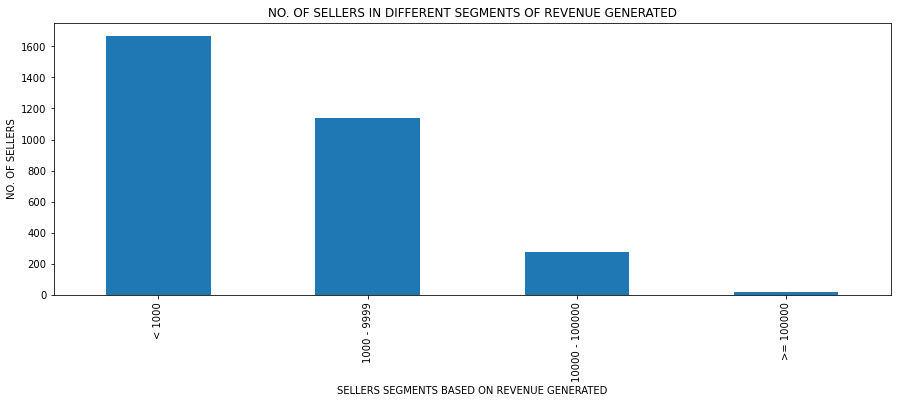

In [30]:
q2_data_b['sales_segment'].value_counts().plot(kind = 'bar', figsize = (15, 5))
plt.xlabel('SELLERS SEGMENTS BASED ON REVENUE GENERATED')
plt.ylabel('NO. OF SELLERS')
plt.title('NO. OF SELLERS IN DIFFERENT SEGMENTS OF REVENUE GENERATED')
plt.show()

### Q3. Cross-Selling (Which products are selling together)

Hint: We need to find which of the top 10 combinations of products are selling together in
each transaction. (combination of 2 or 3 buying together)

### STEP 1 :

In this step I have filtered all those orders where total quantity of products was less than 2.

In [15]:
q3_data = order_items.groupby('order_id', as_index = False).agg({'order_item_id' : 'count'})[['order_id', 'order_item_id']].sort_values('order_item_id', ascending = False)
q3_data = q3_data.loc[q3_data['order_item_id'] >= 2]
q3_data.rename(columns = {'order_item_id' : 'no_of_products'}, inplace = True)

In [16]:
q3_data

,order_id,no_of_products
50137,8272b63d03f5f79c56e9e4120aec44ef,21
10459,1b15974a0141d54e36626dca3fdc731a,20
65715,ab14fdcfbe524636d65ee38360e22ce8,20
60941,9ef13efd6949e4573a18964dd1bbe7f5,15
25583,428a2f660dc84138d969ccd69a0ab6d5,15
...,...,...
95300,f74730419f6f2508e020bfb728606058,2
71036,b8831de8421ce05d880cb13b8610f9c3,2
76281,c5ed857804a0f52fd862cf81de0b261f,2
47039,7a363dd1eb003c19a36e4eba73e3105d,2


### STEP 2 :

In this step I have merged above filtered dataset with order_items table to get the list of products present in those orders.
The item_present variable is created to mark the presence of a particular product in an order, this will be helpful in creating a pivot table.

In [17]:
q3_data = pd.merge(left = order_items, right = q3_data, on = 'order_id', how = 'inner')[['order_id', 'product_id', 'no_of_products']].sort_values('no_of_products')[['order_id', 'product_id', 'no_of_products']]
q3_data['item_present'] = 1
q3_data

,order_id,product_id,no_of_products,item_present
0,0008288aa423d2a3f00fcb17cd7d8719,368c6c730842d78016ad823897a372db,2,1
14080,984b33682c48ca8bfd773ebdfd0161fe,20531b0644a0719b8d506c4db3c56609,2,1
14079,9846cae21962f6c6e65ad2e77d3c2be7,49f57e8347e394d0ddfcc1c8acaf9b2d,2,1
14078,9846cae21962f6c6e65ad2e77d3c2be7,7eb2e1637a623d3491843dff3bad4836,2,1
14077,9843b547a4604774985b674a0876c87b,ff7c7524d5f9a8386ab27088ec03c1fb,2,1
...,...,...,...,...
12169,8272b63d03f5f79c56e9e4120aec44ef,05b515fdc76e888aada3c6d66c201dff,21,1
12167,8272b63d03f5f79c56e9e4120aec44ef,05b515fdc76e888aada3c6d66c201dff,21,1
12166,8272b63d03f5f79c56e9e4120aec44ef,270516a3f41dc035aa87d220228f844c,21,1
12175,8272b63d03f5f79c56e9e4120aec44ef,05b515fdc76e888aada3c6d66c201dff,21,1


### STEP 3 :

Creating a pivot table out of the dataset we got after step 2. All the null values are filled with 0. The output of this step will show the presence of a product in an order.

In [18]:
q3_data = q3_data.pivot_table(index = ['order_id'], columns = ['product_id'], values = 'item_present', fill_value = 0).reset_index()

In [19]:
q3_data.head()

product_id,order_id,0011c512eb256aa0dbbb544d8dffcf6e,001795ec6f1b187d37335e1c4704762e,001b72dfd63e9833e8c02742adf472e3,00210e41887c2a8ef9f791ebc780cc36,00250175f79f584c14ab5cecd80553cd,002af88741ba70c7b5cf4e4a0ad7ef85,003a31970fea14fffe92ac856b8a9b97,003c0b8f6580c850bd2e32044d2ac307,0042f1a9a7e0edd1400c6cd0fda065f8,...,ffbc83054b3741a8d67fc59d9cf9d42d,ffbe169d395060d7fb975c990581a329,ffc9caf33e2d1e9f44e3e06da19085f7,ffcfaba393e8ef71937c6e8421bc2868,ffd4bf4306745865e5692f69bd237893,ffe8083298f95571b4a66bfbc1c05524,ffef256879dbadcab7e77950f4f4a195,fff0a542c3c62682f23305214eaeaa24,fff1059cd247279f3726b7696c66e44e,fff28f91211774864a1000f918ed00cc
0,0008288aa423d2a3f00fcb17cd7d8719,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,00143d0f86d6fbd9f9b38ab440ac16f5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,001ab0a7578dd66cd4b0a71f5b6e1e41,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,001d8f0e34a38c37f7dba2a37d4eba8b,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,002c9def9c9b951b1bec6d50753c9891,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# Dropping the order_id variable since it is useless for further analysis.
q3_data.drop(columns = ['order_id'], inplace = True)

### STEP 5 :

The next 6 lines of code are written to filter out the useless orders and products, i.e. those orders which contained only 1 product and those products which were present in only 1 order. These lines of code were executed recursively in the order they are written until the dataset was free all unnecessary data. Further this step was done to reduce the executon time of code since it was very time consuming to perform any operation on the dataset we got after the above step with 8158 variables.

In [96]:
(q3_data.iloc[ :, : ].sum(axis = 1) <= 1).sum()

0

In [97]:
q3_data = q3_data.loc[q3_data.iloc[ :, : ].sum(axis = 1) >= 2, ]

In [98]:
q3_data.shape

(785, 440)

In [99]:
counter = 0

for column in q3_data.columns :
    if (q3_data[column].sum() == 0) | (q3_data[column].sum() == 1) :
        counter += 1
        
print('No. of columns with sum 0 and 1 : ', counter)

No. of columns with sum 0 and 1 :  0


In [100]:
for column in q3_data.columns :
    if (q3_data[column].sum() == 0) | (q3_data[column].sum() == 1) :
        q3_data.drop(columns = [column], inplace = True)

In [101]:
q3_data.shape

(785, 440)

In [102]:
q3_data.head()

product_id,005030ef108f58b46b78116f754d8d38,0129d1e9b29d3fe6833cc922374cd252,013ee64977aaa6b2b25475095162e0e9,014a8a503291921f7b004a5215bb3c36,0152f69b6cf919bcdaf117aa8c43e5a2,017692475c1c954ff597feda05131d73,02475368dfb38934fe55f574024fe1d7,03e931f387c2dd5b006aecdb12515b2e,056d012d264624accb7f73d31caee034,058b372f969b59e8c4a27e224243909c,...,fb29f48bfea41db52e349454f433340e,fb55982be901439613a95940feefd9ee,fb783e3e545937820b57fe539b2c5a6c,fbc1488c1a1e72ba175f53ab29a248e8,fc1d8637c0268af3db482c14b7ef8e75,fc2d17e60bdd3349a25f3ca6a802a91e,fc5dd987f12a7b823a76a44aa1ba88f6,fcf311603fa276d415c006188e7bd070,fd91e23b4465803725f329b39afe018a,ff2c1ec09b1bb340e84f0d6b21cc7dbb
22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## STEP 6 :

Now we have a clean looking data fit for further analysis. Count variable is created to count the number of times, when a particular combination of products were sold together. 

In [103]:
q3_data['count_variable'] = 1
q3_data

product_id,005030ef108f58b46b78116f754d8d38,0129d1e9b29d3fe6833cc922374cd252,013ee64977aaa6b2b25475095162e0e9,014a8a503291921f7b004a5215bb3c36,0152f69b6cf919bcdaf117aa8c43e5a2,017692475c1c954ff597feda05131d73,02475368dfb38934fe55f574024fe1d7,03e931f387c2dd5b006aecdb12515b2e,056d012d264624accb7f73d31caee034,058b372f969b59e8c4a27e224243909c,...,fb55982be901439613a95940feefd9ee,fb783e3e545937820b57fe539b2c5a6c,fbc1488c1a1e72ba175f53ab29a248e8,fc1d8637c0268af3db482c14b7ef8e75,fc2d17e60bdd3349a25f3ca6a802a91e,fc5dd987f12a7b823a76a44aa1ba88f6,fcf311603fa276d415c006188e7bd070,fd91e23b4465803725f329b39afe018a,ff2c1ec09b1bb340e84f0d6b21cc7dbb,count_variable
22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
44,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
52,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
60,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9766,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9771,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
9784,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9788,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [104]:
q3_data.columns

Index(['005030ef108f58b46b78116f754d8d38', '0129d1e9b29d3fe6833cc922374cd252',
       '013ee64977aaa6b2b25475095162e0e9', '014a8a503291921f7b004a5215bb3c36',
       '0152f69b6cf919bcdaf117aa8c43e5a2', '017692475c1c954ff597feda05131d73',
       '02475368dfb38934fe55f574024fe1d7', '03e931f387c2dd5b006aecdb12515b2e',
       '056d012d264624accb7f73d31caee034', '058b372f969b59e8c4a27e224243909c',
       ...
       'fb55982be901439613a95940feefd9ee', 'fb783e3e545937820b57fe539b2c5a6c',
       'fbc1488c1a1e72ba175f53ab29a248e8', 'fc1d8637c0268af3db482c14b7ef8e75',
       'fc2d17e60bdd3349a25f3ca6a802a91e', 'fc5dd987f12a7b823a76a44aa1ba88f6',
       'fcf311603fa276d415c006188e7bd070', 'fd91e23b4465803725f329b39afe018a',
       'ff2c1ec09b1bb340e84f0d6b21cc7dbb', 'count_variable'],
      dtype='object', name='product_id', length=441)

In [105]:
# Extracting columns to be used for grouping the data except count_variable since it will be used for aggretation purposes.
grouping_columns = list(q3_data.columns.difference([('count_variable')]))

In [108]:
# Grouping the Data, we got our semi-final output.
q3_data = q3_data.groupby((grouping_columns), as_index = False).agg('sum').sort_values('count_variable', ascending = False).head(15)
q3_data

product_id,005030ef108f58b46b78116f754d8d38,0129d1e9b29d3fe6833cc922374cd252,013ee64977aaa6b2b25475095162e0e9,014a8a503291921f7b004a5215bb3c36,0152f69b6cf919bcdaf117aa8c43e5a2,017692475c1c954ff597feda05131d73,02475368dfb38934fe55f574024fe1d7,03e931f387c2dd5b006aecdb12515b2e,056d012d264624accb7f73d31caee034,058b372f969b59e8c4a27e224243909c,...,fb55982be901439613a95940feefd9ee,fb783e3e545937820b57fe539b2c5a6c,fbc1488c1a1e72ba175f53ab29a248e8,fc1d8637c0268af3db482c14b7ef8e75,fc2d17e60bdd3349a25f3ca6a802a91e,fc5dd987f12a7b823a76a44aa1ba88f6,fcf311603fa276d415c006188e7bd070,fd91e23b4465803725f329b39afe018a,ff2c1ec09b1bb340e84f0d6b21cc7dbb,count_variable
241,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,34
254,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,26
166,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17
244,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
346,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
142,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
439,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
131,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
385,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


## STEP 7 :

After getting our semi-final data by grouping the dataset based on products getting sold together and filtering out top 15 combinations, we will further removw those products which were not present in the top 15. 

In [109]:
counter = 0

for column in q3_data.columns :
    if q3_data[column].sum() == 0 :
        counter += 1
        
print('No. of columns with sum 0 : ', counter)

No. of columns with sum 0 :  413


In [110]:
for column in q3_data.columns :
    if q3_data[column].sum() == 0 :
        q3_data.drop(columns = [column], inplace = True)

## FINAL OUTPUT WITH TOP 15 PRODUCT COMBINATIONS SOLD TOGETHER

In [111]:
q3_data

product_id,060cb19345d90064d1015407193c233d,0aabfb375647d9738ad0f7b4ea3653b1,0d85c435fd60b277ffb9e9b0f88f927a,18486698933fbb64af6c0a255f7dd64c,35afc973633aaeb6b877ff57b2793310,368c6c730842d78016ad823897a372db,36f60d45225e60c7da4558b070ce4b60,389d119b48cf3043d311335e499d9c6b,3f14d740544f37ece8a9e7bc8349797e,422879e10f46682990de24d770e7f83d,...,a50acd33ba7a8da8e9db65094fa990a4,ad4b5def91ac7c575dbdf65b5be311f4,dbb67791e405873b259e4656bf971246,dfb97c88e066dc22165f31648efe1312,e53e557d5a159f5aa2c5e995dfdf244b,e5ae72c62ebfa708624f5029d609b160,e6b314a2236c162ede1a879f1075430f,ee57070aa3b24a06fdd0e02efd2d757d,f4f67ccaece962d013a4e1d7dc3a61f7,count_variable
241,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,34
254,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,26
166,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,17
244,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,12
233,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,9
346,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,7
142,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,6
439,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
131,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
385,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,6


### Q4. Payment Behaviour
### (a)
How customers are paying?

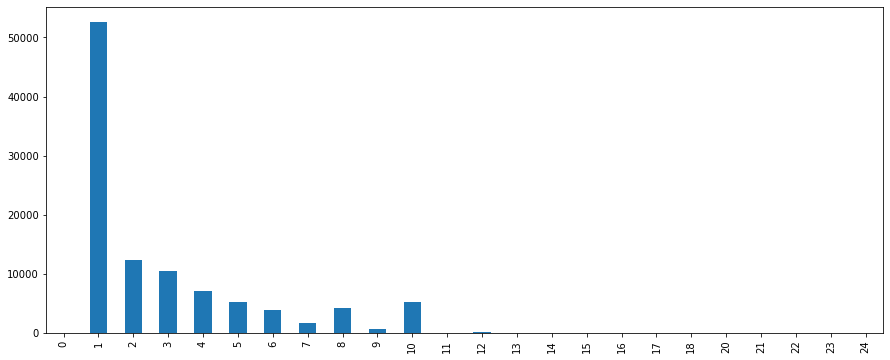

In [244]:
order_payments.payment_installments.value_counts().sort_index().plot(kind = 'bar', figsize = (15, 6))
plt.show()

### (b)
Which payment channels are used by most customers?

In [36]:
order_payments.payment_type.value_counts()

credit_card    76795
UPI            19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

### Q5. Customer satisfaction towards category & product
### (a)
Which categories (top 10) are maximum rated & minimum rated?

In [42]:
q5_data = pd.merge(left = order_review_ratings, right = order_items, how = 'left', on = 'order_id')[['product_id', 'review_score']]
q5_data.head()

,product_id,review_score
0,fd25ab760bfbba13c198fa3b4f1a0cd3,4
1,fd25ab760bfbba13c198fa3b4f1a0cd3,4
2,be0dbdc3d67d55727a65d4cd696ca73c,5
3,d1c427060a0f73f6b889a5c7c61f2ac4,5
4,52c80cedd4e90108bf4fa6a206ef6b03,5


In [43]:
q5_data_a = q5_data[['product_id', 'review_score']].groupby('product_id', as_index = False).agg('mean').sort_values('review_score', ascending = False)

In [44]:
q5_data_a = pd.concat([q5_data_a.head(10), q5_data_a.tail(10)], axis = 0)

#### TOP 10 AND BOTTOM 10 PRODUCT CATEGORIES BASED ON REVIEW RATINGS

In [45]:
pd.merge(left = q5_data_a, right = products, on = 'product_id', how = 'left')[['product_category_name', 'review_score']]

,product_category_name,review_score
0,Perfumery,5.0
1,Health_Beauty,5.0
2,Computers_Accessories,5.0
3,Telephony,5.0
4,Toys,5.0
5,Housewares,5.0
6,Furniture_Decor,5.0
7,Baby,5.0
8,Housewares,5.0
9,Garden_Tools,5.0


### (b)
Which products (top10) are maximum rated & minimum rated?

In [48]:
q5_data_b = q5_data.groupby('product_id', as_index = False).mean().sort_values('review_score', ascending = False)

#### TOP 10 AND BOTTOM 10 PRODUCTS BASED ON REVIEW RATINGS

In [49]:
pd.concat([q5_data_b.head(10), q5_data_b.tail(10)], axis = 0)

,product_id,review_score
0,00066f42aeeb9f3007548bb9d3f33c38,5.0
17330,86743ff92eee3d16b7df59cddd583b8c,5.0
17345,868ceb027ab706a4dee42e2220006b85,5.0
17343,868969d3a93aeeab7bfcd4fc3d3d65de,5.0
17342,868766ed2172644fdd977d6bd395a107,5.0
17340,8684bd8f93b4f4038d07188a23811e93,5.0
17335,867c96d2bb67aba6500a4c509cf76072,5.0
17334,867b820367ec206b38a357f2c12454b7,5.0
17333,867901d7e8488fb97f1fb538c09d476e,5.0
17325,865bfa00c1dad8f4146d3c2765f051ca,5.0


### (c)
Average rating by location, seller, product, category, month etc.

In [70]:
q5_data_c = pd.merge(left = order_review_ratings, right = order_items, on = 'order_id', how = 'left')[['review_id', 'review_score', 'order_id', 'seller_id']]

In [71]:
q5_data_c = pd.merge(left = q5_data_c, right = sellers, on = 'seller_id', how = 'left')[['review_id', 'review_score', 'order_id', 'seller_id', 'seller_city', 'seller_state']]

#### AVERAGE RATING FOR EACH SELLER

In [72]:

q5_data_c.groupby('seller_id', as_index = False).agg('mean')[['seller_id', 'review_score']]

,seller_id,review_score
0,0015a82c2db000af6aaaf3ae2ecb0532,3.666667
1,001cca7ae9ae17fb1caed9dfb1094831,3.874477
2,001e6ad469a905060d959994f1b41e4f,1.000000
3,002100f778ceb8431b7a1020ff7ab48f,3.982143
4,003554e2dce176b5555353e4f3555ac8,5.000000
...,...,...
3090,ffcfefa19b08742c5d315f2791395ee5,1.000000
3091,ffdd9f82b9a447f6f8d4b91554cc7dd3,4.250000
3092,ffeee66ac5d5a62fe688b9d26f83f534,4.214286
3093,fffd5413c0700ac820c7069d66d98c89,3.885246


In [74]:
q5_data_c = pd.merge(left = q5_data_c, right = orders, on = 'order_id', how = 'left').iloc[:, :7]

In [75]:
q5_data_c = pd.merge(left = q5_data_c, right = customers, on = 'customer_id', how = 'left')[['review_id', 'review_score', 'customer_id', 'customer_city']]

#### AVERAGE RATING FOR EACH CUSTOMER CITY

In [77]:
q5_data_c.groupby('customer_city', as_index = False).agg('mean')[['customer_city', 'review_score']]

,customer_city,review_score
0,Aadityana,3.550000
1,Aambaliyasan,3.500000
2,Aantaliya,3.920000
3,Aarambhada,3.568627
4,Abiramam,5.000000
...,...,...
4114,Zamin Uthukuli,4.000000
4115,Ziauddin Pur,4.012422
4116,Zira,4.500000
4117,Zirakpur,4.500000
